In [1]:
from sklearn.datasets import load_iris
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [2]:
X,y=load_iris(return_X_y=True)
x_1 = keras.Input(shape=(X.shape[1],), name='x_1')
h1_1 = layers.Dense(len(set(y)), activation='softmax')(x_1)
model = keras.Model(inputs=[x_1], outputs=h1_1)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_1 (InputLayer)             [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


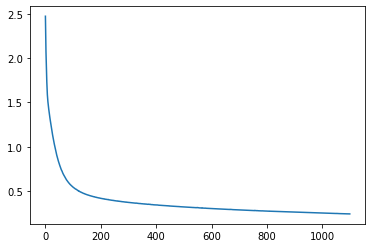

In [3]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy())
history = model.fit(X,y,batch_size=100,epochs=1100, verbose=0)
plt.plot(history.history['loss'])
plt.show()

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [17]:
KXa10=0
KXp10=0
KXr10=0
wp10=0
wr10=0
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=36851234)
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train,batch_size=100,epochs=1100, verbose=0)
    yp=np.argmax(model.predict(X_test),axis=-1)
    KXa10+=accuracy_score(y_test,yp)
    KXp10+=precision_score(y_test,yp,average=None)
    wp10+=precision_score(y_test,yp,average='weighted')
    KXr10+=recall_score(y_test,yp,average=None)
    wr10+=recall_score(y_test,yp,average='weighted')
KXa10/=10
KXp10/=10
KXr10/=10
wp10/=10
wr10/=10

In [24]:
print("Accuracy:%f"%KXa10)
print("-----------------------------------------------")
print("逐類的precision: %f, %f, %f"%(KXp10[0],KXp10[1],KXp10[2]))
print("-----------------------------------------------")
print("使用weighted得到的precision:%f"%wp10)
print("-----------------------------------------------")
print("逐類的recall: %f, %f, %f"%(KXr10[0],KXr10[1],KXr10[2]))
print("-----------------------------------------------")
print("使用weighted得到的recall:%f"%wr10)

Accuracy:0.973333
-----------------------------------------------
逐類的precision: 1.000000, 0.983333, 0.950000
-----------------------------------------------
使用weighted得到的precision:0.977778
-----------------------------------------------
逐類的recall: 1.000000, 0.940000, 0.980000
-----------------------------------------------
使用weighted得到的recall:0.973333


In [27]:
KcXa10=0
KcXp10=0
KcXr10=0
cwp10=0
cwr10=0
cX=np.cos(X)
crskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=36851234)
for train_index, test_index in crskf.split(cX, y):
    X_train, X_test = cX[train_index], cX[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train,batch_size=100,epochs=1100, verbose=0)
    cyp=np.argmax(model.predict(X_test),axis=-1)
    KcXa10+=accuracy_score(y_test,cyp)
    KcXp10+=precision_score(y_test,cyp,average=None)
    cwp10+=precision_score(y_test,cyp,average='weighted')
    KcXr10+=recall_score(y_test,cyp,average=None)
    cwr10+=recall_score(y_test,cyp,average='weighted')
KcXa10/=10
KcXp10/=10
KcXr10/=10
cwp10/=10
cwr10/=10

In [28]:
print("以下是將原始資料經由cos轉換過後的結果")
print("Accuracy:%f"%KcXa10)
print("-----------------------------------------------")
print("逐類的precision: %f, %f, %f"%(KcXp10[0],KcXp10[1],KcXp10[2]))
print("-----------------------------------------------")
print("使用weighted得到的precision:%f"%cwp10)
print("-----------------------------------------------")
print("逐類的recall: %f, %f, %f"%(KcXr10[0],KcXr10[1],KcXr10[2]))
print("-----------------------------------------------")
print("使用weighted得到的recall:%f"%cwr10)

以下是將原始資料經由cos轉換過後的結果
Accuracy:0.933333
-----------------------------------------------
逐類的precision: 1.000000, 0.896429, 0.925000
-----------------------------------------------
使用weighted得到的precision:0.940476
-----------------------------------------------
逐類的recall: 0.980000, 0.940000, 0.880000
-----------------------------------------------
使用weighted得到的recall:0.933333


In [29]:
print("以上結果選擇使用precision來做舉例說明，若我們不希望發生「被我們歸類的花朵(歸類為label(0 or 1 or 2))明明不屬於該類別卻被我們歸類為該類別」的事件發生時，此時的precision越高越好")

以上結果選擇使用precision來做舉例說明，若我們不希望發生「被我們歸類的花朵(歸類為label(0 or 1 or 2))明明不屬於該類別卻被我們歸類為該類別」的事件發生時，此時的precision越高越好


In [33]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
LKXa10=0
LKXp10=0
LKXr10=0
Lwp10=0
Lwr10=0
Lrskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=36851234)
for train_index, test_index in Lrskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Lp = LogisticRegression(random_state=0,multi_class = 'multinomial',solver='sag').fit(X_train, y_train)
    Lyp=Lp.predict(X_test)
    LKXa10+=accuracy_score(y_test,Lyp)
    LKXp10+=precision_score(y_test,Lyp,average=None)
    Lwp10+=precision_score(y_test,Lyp,average='weighted')
    LKXr10+=recall_score(y_test,Lyp,average=None)
    Lwr10+=recall_score(y_test,Lyp,average='weighted')
LKXa10/=10
LKXp10/=10
LKXr10/=10
Lwp10/=10
Lwr10/=10

In [36]:
print("以下是使用sklearn.linear_model.LogisticRegression的結果")
print("Accuracy:%f"%LKXa10)
print("-----------------------------------------------")
print("逐類的precision: %f, %f, %f"%(LKXp10[0],LKXp10[1],LKXp10[2]))
print("-----------------------------------------------")
print("使用weighted得到的precision:%f"%Lwp10)
print("-----------------------------------------------")
print("逐類的recall: %f, %f, %f"%(LKXr10[0],LKXr10[1],LKXr10[2]))
print("-----------------------------------------------")
print("使用weighted得到的recall:%f"%Lwr10)
print("-----------------------------------------------")
print("藉由上方資料可發現使用sklearn.linear_model.LogisticRegression和使用Functional API架設之神經網路的差異並不大")

以下是使用sklearn.linear_model.LogisticRegression的結果
Accuracy:0.986667
-----------------------------------------------
逐類的precision: 1.000000, 1.000000, 0.966667
-----------------------------------------------
使用weighted得到的precision:0.988889
-----------------------------------------------
逐類的recall: 1.000000, 0.960000, 1.000000
-----------------------------------------------
使用weighted得到的recall:0.986667
-----------------------------------------------
藉由上方資料可發現使用sklearn.linear_model.LogisticRegression和使用Functional API架設之神經網路的差異並不大
